<a href="https://colab.research.google.com/github/MishaK2/Big-Data/blob/main/%D0%9F%D0%97_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

Descriptive and Visual Analysis of the planets dataset

Goal: explore the planets dataset and create a compact, reproducible notebook that performs descriptive statistics, visual analysis, and a short written summary of insights

Dataset: load with sns.load_dataset('planets'). Key columns you will use:
method (detection method, categorical), number (number of planets in system), orbital_period (days), mass (Jupiter masses), distance (light-years), year (discovery year)

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# для відображення графіків прямо в ноутбуці
%matplotlib inline


In [ ]:
# Завантаження датасету "planets"
df = sns.load_dataset('planets')

# Показати перші 5 рядків таблиці
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
# Загальна інформація про датасет
print("Розмір (рядки, стовпці):", df.shape)
print("\nТипи даних:")
print(df.dtypes)

# Перевіримо пропуски
print("\nКількість пропусків у кожній колонці:")
print(df.isnull().sum())

Розмір (рядки, стовпці): (1035, 6)

Типи даних:
method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

Кількість пропусків у кожній колонці:
method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


In [ ]:
# Описова статистика по числових стовпцях
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [ ]:
# Унікальні методи виявлення
print("Кількість методів:", df['method'].nunique())
print("\nТоп-5 методів виявлення:")
print(df['method'].value_counts().head())

Кількість методів: 10

Топ-5 методів виявлення:
method
Radial Velocity              553
Transit                      397
Imaging                       38
Microlensing                  23
Eclipse Timing Variations      9
Name: count, dtype: int64


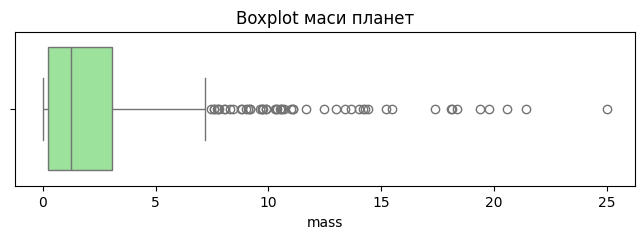

In [ ]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df['mass'], color='lightgreen')
plt.title('Boxplot маси планет')
plt.show()

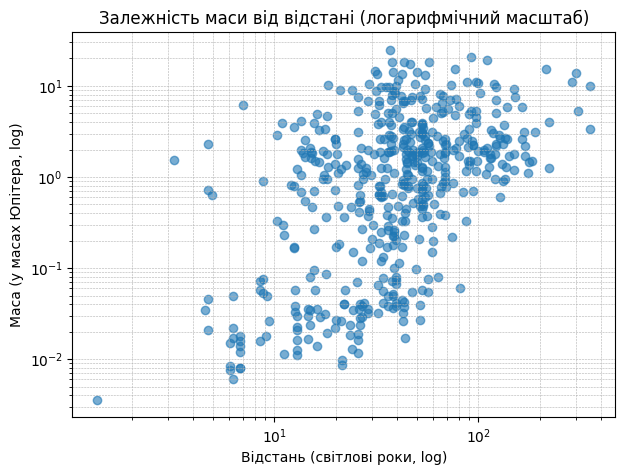

In [ ]:
df_md = df.dropna(subset=['mass', 'distance'])
plt.figure(figsize=(7,5))
plt.scatter(df_md['distance'], df_md['mass'], alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Відстань (світлові роки, log)')
plt.ylabel('Маса (у масах Юпітера, log)')
plt.title('Залежність маси від відстані (логарифмічний масштаб)')
plt.grid(True, which="both", ls="--", linewidth=0.4)
plt.show()


/tmp/ipython-input-2748513217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='method', data=df, order=df['method'].value_counts().index[:10], palette='viridis')


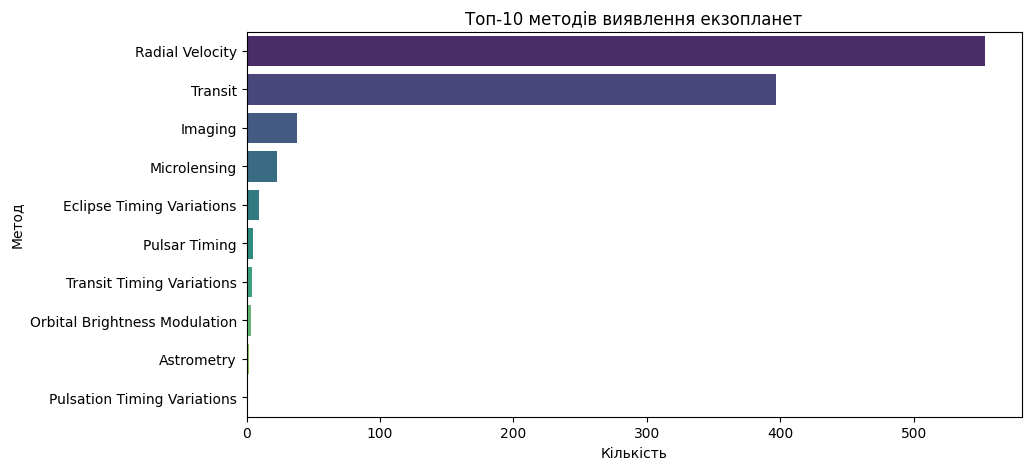

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='method', data=df, order=df['method'].value_counts().index[:10], palette='viridis')
plt.title('Топ-10 методів виявлення екзопланет')
plt.xlabel('Кількість')
plt.ylabel('Метод')
plt.show()

### Висновки

- Датасет містить інформацію про понад 1000 екзопланет.
- Основні змінні: метод виявлення, кількість планет, орбітальний період, маса, відстань, рік відкриття.
- Найпоширеніші методи виявлення — radial velocity та transit.
- Маса та відстань мають великий розкид, тому аналіз виконується у логарифмічному масштабі.
- Є слабка кореляція між масою та відстанню, що вказує на різні властивості систем.

In [ ]:
plt.savefig('mass_vs_distance.png', dpi=200, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>